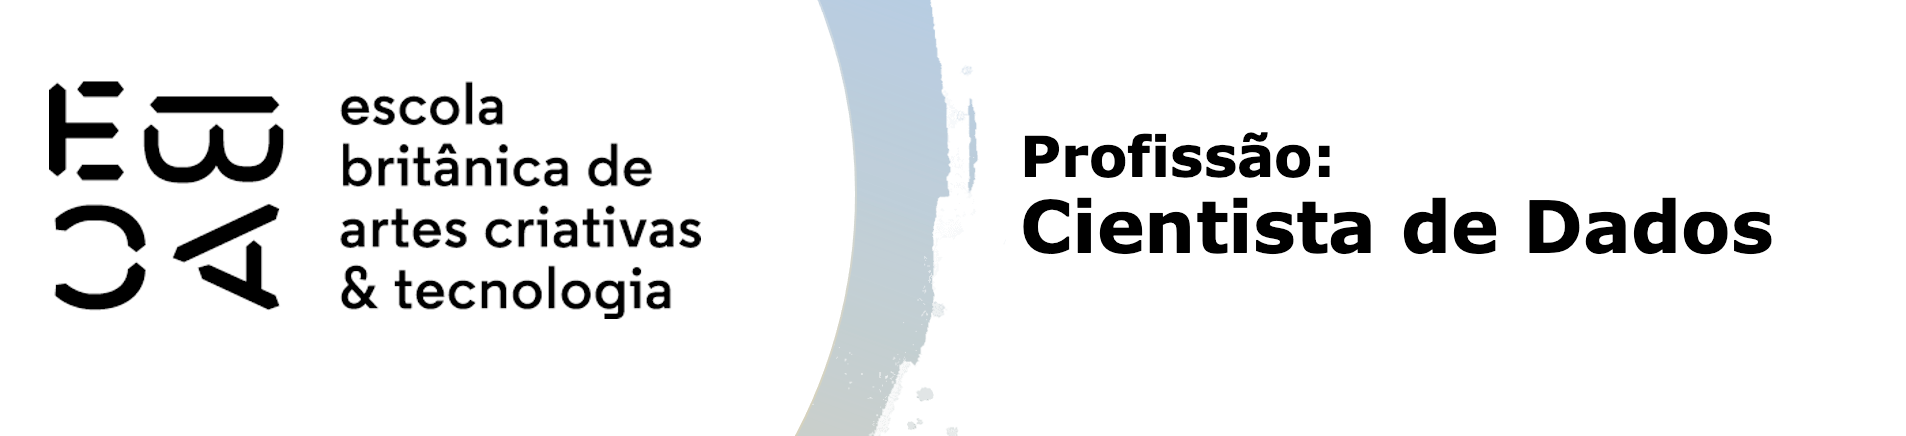

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


In [5]:
# Informaçoes Gerais:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187646 entries, 0 to 187645
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CNPJ emit.           187646 non-null  object        
 1   Emitente             187646 non-null  object        
 2   No.                  187646 non-null  int64         
 3   Data Emissão         187646 non-null  datetime64[ns]
 4   Valor NF             187646 non-null  float64       
 5   Data Registro        187646 non-null  datetime64[ns]
 6   Créditos             187646 non-null  float64       
 7   Situação do Crédito  187646 non-null  category      
 8   Ano                  187646 non-null  int64         
 9   Semestre             187646 non-null  int64         
 10  Retorno              186666 non-null  float64       
 11  flag_credito         187646 non-null  int64         
 12  categoria            187646 non-null  object        
dtypes: category(1)

In [6]:
# Missing Values = existem 980 missing values na variavel retorno
df.isna().sum()

CNPJ emit.               0
Emitente                 0
No.                      0
Data Emissão             0
Valor NF                 0
Data Registro            0
Créditos                 0
Situação do Crédito      0
Ano                      0
Semestre                 0
Retorno                980
flag_credito             0
categoria                0
dtype: int64

In [7]:
# Tratamento dos missing values: removi as linhas dos dados nulos pois significava 0,5% do dataset apenas
df = df.dropna()

## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [9]:
# Filtro dos dados de janeiro de 2020 em diante
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'])
df = df[df['Data Emissão'] >= '2020-01-01']
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
64598,05.234.750/0001-41,TX BURGER LTDA,77882,2020-01-01,78.80,2020-08-01,0.0,A Calcular,2019,2,0.0,0,não definido
64599,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,2020-01-01,22.71,2020-01-01,0.0,A Calcular,2019,2,0.0,0,Mercado
64600,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,2020-01-01,35.90,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Alimentos
64601,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,2020-01-01,21.77,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Farmácia
64602,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,2020-01-01,80.95,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Restaurantes


In [10]:
# Analise das notas que tiveram retorno>0 por categoria de estabelecimento
tab = pd.crosstab(df.categoria,df.Retorno > 0, margins=True)
tab

Retorno,False,True,All
categoria,,,
Alimentos,1608,3442,5050
Auto posto,405,135,540
Construção,8521,7523,16044
Farmácia,6607,3582,10189
Mercado,14376,13177,27553
Restaurantes,553,1626,2179
Varejo,3481,701,4182
Vestuário,1472,443,1915
não definido,11659,6689,18348


In [11]:
# Proporção de notas que tiveram retorno>0 por categoria de estabelecimento
tab['Proporcao True'] = tab[1]/tab['All']
tab

Retorno,False,True,All,Proporcao True
categoria,,,,
Alimentos,1608,3442,5050,0.681584
Auto posto,405,135,540,0.250000
Construção,8521,7523,16044,0.468898
Farmácia,6607,3582,10189,0.351556
Mercado,14376,13177,27553,0.478242
Restaurantes,553,1626,2179,0.746214
Varejo,3481,701,4182,0.167623
Vestuário,1472,443,1915,0.231332
não definido,11659,6689,18348,0.364563


C:\Users\AJWork\AppData\Local\Temp\ipykernel_3580\676261484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tab['Proporcao True'], palette="mako")


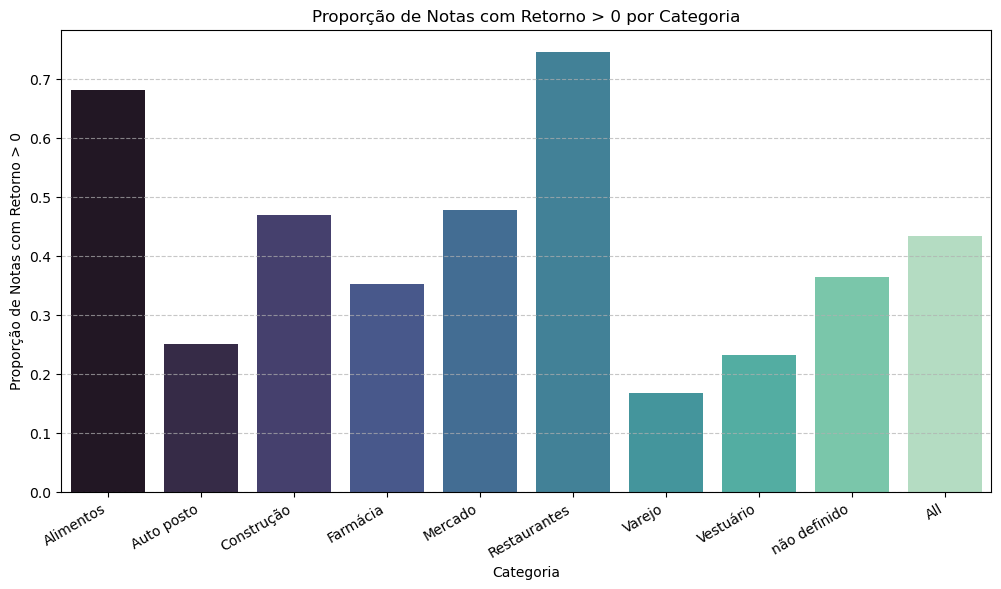

In [12]:
# Grafico de visualizacao da analise
plt.figure(figsize=(12, 6))
sns.barplot(data=tab['Proporcao True'], palette="mako")
plt.title("Proporção de Notas com Retorno > 0 por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Proporção de Notas com Retorno > 0")
plt.xticks(rotation=30, ha="right")  
plt.grid(axis="y", linestyle="--", alpha=0.7)  

plt.show()

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [14]:
rotulo_evento = tab.columns[1]
rotulo_nao_evento = tab.columns[0]

In [15]:
tab['pct_evento'] = tab[rotulo_evento]/tab.loc['All', rotulo_evento]
tab['pct_nao_evento'] = tab[rotulo_nao_evento]/tab.loc['All', rotulo_nao_evento]
tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
tab

Retorno,False,True,All,Proporcao True,pct_evento,pct_nao_evento,woe
categoria,,,,,,,
Alimentos,1608,3442,5050,0.681584,0.092234,0.033031,1.026895
Auto posto,405,135,540,0.250000,0.003618,0.008319,-0.832779
Construção,8521,7523,16044,0.468898,0.201592,0.175034,0.141265
Farmácia,6607,3582,10189,0.351556,0.095986,0.135718,-0.346375
Mercado,14376,13177,27553,0.478242,0.353100,0.295304,0.178746
Restaurantes,553,1626,2179,0.746214,0.043571,0.011359,1.344354
Varejo,3481,701,4182,0.167623,0.018785,0.071505,-1.336733
Vestuário,1472,443,1915,0.231332,0.011871,0.030237,-0.934974
não definido,11659,6689,18348,0.364563,0.179243,0.239493,-0.289780


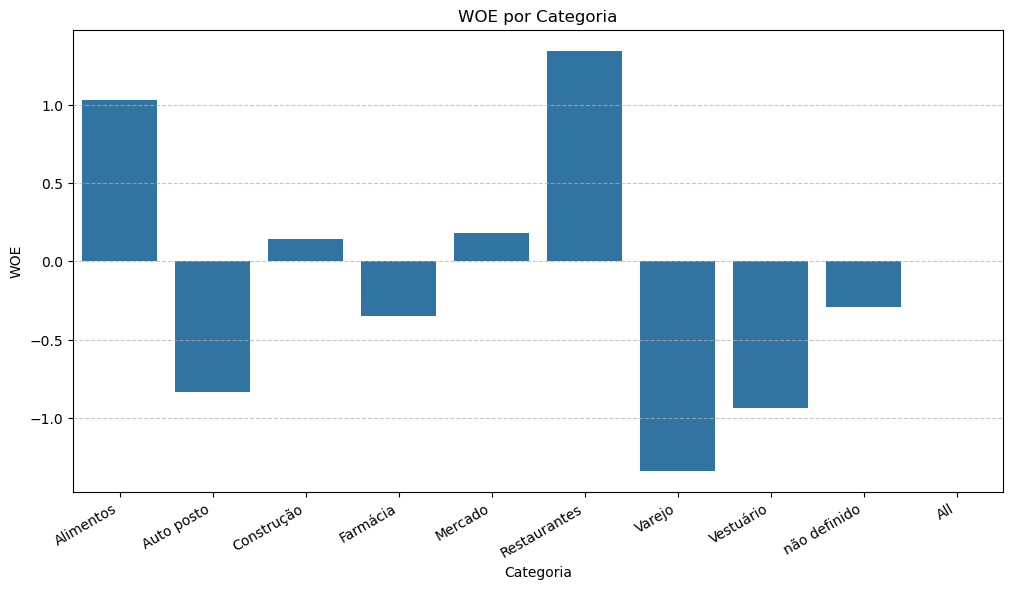

In [16]:
# Grafico de visualizacao do WOE
plt.figure(figsize=(12, 6))
sns.barplot(data=tab['woe'])
plt.title("WOE por Categoria")
plt.xlabel("Categoria")
plt.ylabel("WOE")
plt.xticks(rotation=30, ha="right")  
plt.grid(axis="y", linestyle="--", alpha=0.7)  

plt.show()

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [18]:
tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
tab

Retorno,False,True,All,Proporcao True,pct_evento,pct_nao_evento,woe,iv_parcial
categoria,,,,,,,,
Alimentos,1608,3442,5050,0.681584,0.092234,0.033031,1.026895,0.060796
Auto posto,405,135,540,0.250000,0.003618,0.008319,-0.832779,0.003916
Construção,8521,7523,16044,0.468898,0.201592,0.175034,0.141265,0.003752
Farmácia,6607,3582,10189,0.351556,0.095986,0.135718,-0.346375,0.013762
Mercado,14376,13177,27553,0.478242,0.353100,0.295304,0.178746,0.010331
Restaurantes,553,1626,2179,0.746214,0.043571,0.011359,1.344354,0.043304
Varejo,3481,701,4182,0.167623,0.018785,0.071505,-1.336733,0.070473
Vestuário,1472,443,1915,0.231332,0.011871,0.030237,-0.934974,0.017172
não definido,11659,6689,18348,0.364563,0.179243,0.239493,-0.289780,0.017459


In [19]:
# IV Total
tab.iv_parcial.sum()

0.24096448519764424

## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


<span style="color:green; font-size:18px; font-weight:bold"> Análise das Proporções de Retorno </span>

- **Categorias com maior proporção de retorno > 0:**
  - **Restaurantes** (74.6%)
  - **Alimentos** (68.1%) 
<br><br>
- **Categorias com menor proporção de retorno > 0:**
  - **Varejo** (16.7%)
  - **Auto Posto** (25.0%)
  - **Vestuário** (23.1%)

---

<span style="color:blue; font-size:18px; font-weight:bold"> Análise do WOE (Weight of Evidence) </span>

- **WOE Positivo** *(forte relação com retorno positivo):*
  - **Restaurantes** (+1.34) -> Categoria altamente associada a gerar créditos.
  - **Alimentos** (+1.02) -> Também possui forte impacto positivo.
<br><br>
- **WOE Negativo** *(associado a notas sem retorno):*
  - **Varejo** (-1.33)
  - **Vestuário** (-0.93)
  - **Auto Posto** (-0.83)

---

<span style="color:orange; font-size:18px; font-weight:bold"> Análise do Information Value (IV) </span>

**Regras para interpretar o IV (segundo Naeem Siddiqi):**

| Faixa          | Poder preditivo |
|---------------|----------------|
| **0 a 0,02**  | Inútil         |
| **0,02 a 0,1** | Fraco         |
| **0,1 a 0,3**  | Médio         |
| **0,3 a 0,5**  | Forte         |
| **0,5 ou mais** | Suspeito de tão alto |

- **Categorias com IV "Inútil"** *(baixo poder preditivo):*  
  - **Auto Posto** -> 0.0039  
  - **Construção** -> 0.0037  
  - **Farmácia** -> 0.0137  
  - **Mercado** -> 0.0103  
  - **Vestuário** -> 0.0171  
<br><br>
- **Categorias com IV "Fraco"** *(alguma relevância na previsão):*  
  - **Alimentos** -> 0.0608  
  - **Restaurantes** -> 0.0433  
  - **Varejo** -> 0.0705  

---

<span style="color:darkred; font-size:18px; font-weight:bold"> Conclusão da Análise </span>

- **Restaurantes e Alimentos** são as categorias **mais associadas à geração de créditos**, possuindo os maiores valores de WOE positivos e altas proporções de notas com retorno.
- **Varejo, Auto Posto e Vestuário** têm **forte associação com notas fiscais sem retorno**, apresentando **WOE negativo** e **baixa proporção de notas que geram crédito**.
- A soma do IV total saiu baixa indicando que categoria tem um poder preditivo fraco

---


## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.
